In [1]:
import xarray as xr # Import the Xarray package
import matplotlib.pyplot as plt # Plotting library
import numpy as np # Import the Numpy package
import cartopy,cartopy.crs as ccrs # Plot maps
import cartopy.feature as cfeature # Collection of points, lines and polygons
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER # Add gridlines and tick labels to a map
import cartopy.io.shapereader as shpreader # Oriented shapefile reader
from netCDF4 import Dataset # Read/Write NetCDF4 files
from datetime import datetime, timedelta # Basics Dates and time types
from matplotlib import cm # Colormap handling utilities
import metpy
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
%matplotlib inline
from mpl_toolkits.basemap import Basemap

In [2]:
ds=xr.open_dataset('C:/Users/igorr/Downloads/OR_GLM-L2-LCFA_G16_s20233071233400_e20233071234000_c20233071234019.nc')
ds

<xarray.Dataset>
Dimensions:                                 (number_of_events: 1506, number_of_groups: 709, number_of_flashes: 47, number_of_time_bounds: 2, number_of_wavelength_bounds: 2, number_of_field_of_view_bounds: 2)
Coordinates: (12/21)
    event_id                                (number_of_events) uint32 ...
    event_time_offset                       (number_of_events) datetime64[ns] ...
    event_lat                               (number_of_events) float32 ...
    event_lon                               (number_of_events) float32 ...
    event_parent_group_id                   (number_of_events) uint32 ...
    group_id                                (number_of_groups) uint32 ...
    ...                                      ...
    product_time                            datetime64[ns] ...
    lightning_wavelength                    float32 ...
    group_time_threshold                    float32 ...
    flash_time_threshold                    float32 ...
    lat_field_of_view                       float32 ...
    lon_field_of_view                       float32 ...
Dimensions without coordinates: number_of_events, number_of_groups, number_of_flashes, number_of_time_bounds, number_of_wavelength_bounds, number_of_field_of_view_bounds
Data variables: (12/27)
    event_energy                            (number_of_events) float32 ...
    group_frame_time_offset                 (number_of_groups) datetime64[ns] ...
    group_area                              (number_of_groups) float32 ...
    group_energy                            (number_of_groups) float32 ...
    group_quality_flag                      (number_of_groups) float32 ...
    flash_frame_time_offset_of_first_event  (number_of_flashes) datetime64[ns] ...
    ...                                      ...
    nominal_satellite_subpoint_lon          float32 ...
    lon_field_of_view_bounds                (number_of_field_of_view_bounds) float32 ...
    percent_uncorrectable_L0_errors         float32 ...
    algorithm_dynamic_input_data_container  int32 ...
    processing_parm_version_container       int32 ...
    algorithm_product_version_container     int32 ...
Attributes: (12/29)
    production_site:           RBU
    featureType:               point
    dataset_name:              OR_GLM-L2-LCFA_G16_s20233071233400_e2023307123...
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    institution:               DOC/NOAA/NESDIS> U.S. Department of Commerce, ...
    ...                        ...
    time_coverage_start:       2023-11-03T12:33:40.0Z
    time_coverage_end:         2023-11-03T12:34:00.0Z
    production_data_source:    Realtime
    production_environment:    OE
    LUT_Filenames:             GLM_CALINR_AllFilters(FM1E_CDRL79RevK_DO_09_00...
    id:                        34840c3e-4444-465f-baff-b4b7c0843607

In [3]:
# Scan's start time, converted to datetime object
scan_start = datetime.strptime(ds.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')
date=scan_start
# Scan's end time, converted to datetime object
scan_end = datetime.strptime(ds.time_coverage_end, '%Y-%m-%dT%H:%M:%S.%fZ')

# File creation time, convert to datetime object
file_created = datetime.strptime(ds.date_created, '%Y-%m-%dT%H:%M:%S.%fZ')

print('Scan Start    : {}'.format(scan_start))
#print('Scan midpoint : {}'.format(scan_mid))
print('Scan End      : {}'.format(scan_end))
print('File Created  : {}'.format(file_created))
print('Scan Duration : {:.2f} minutes'.format((scan_end-scan_start).seconds/60))

Scan Start    : 2023-11-03 12:33:40
Scan End      : 2023-11-03 12:34:00
File Created  : 2023-11-03 12:34:01.900000
Scan Duration : 0.33 minutes


In [4]:
event_lat = ds.variables['event_lat'][:]
event_lon = ds.variables['event_lon'][:]

group_lat = ds.variables['group_lat'][:]
group_lon = ds.variables['group_lon'][:]

flash_lat = ds.variables['flash_lat'][:]
flash_lon = ds.variables['flash_lon'][:]

Text(1.0, 1.0, '12:33UTC 03/Nov/2023')

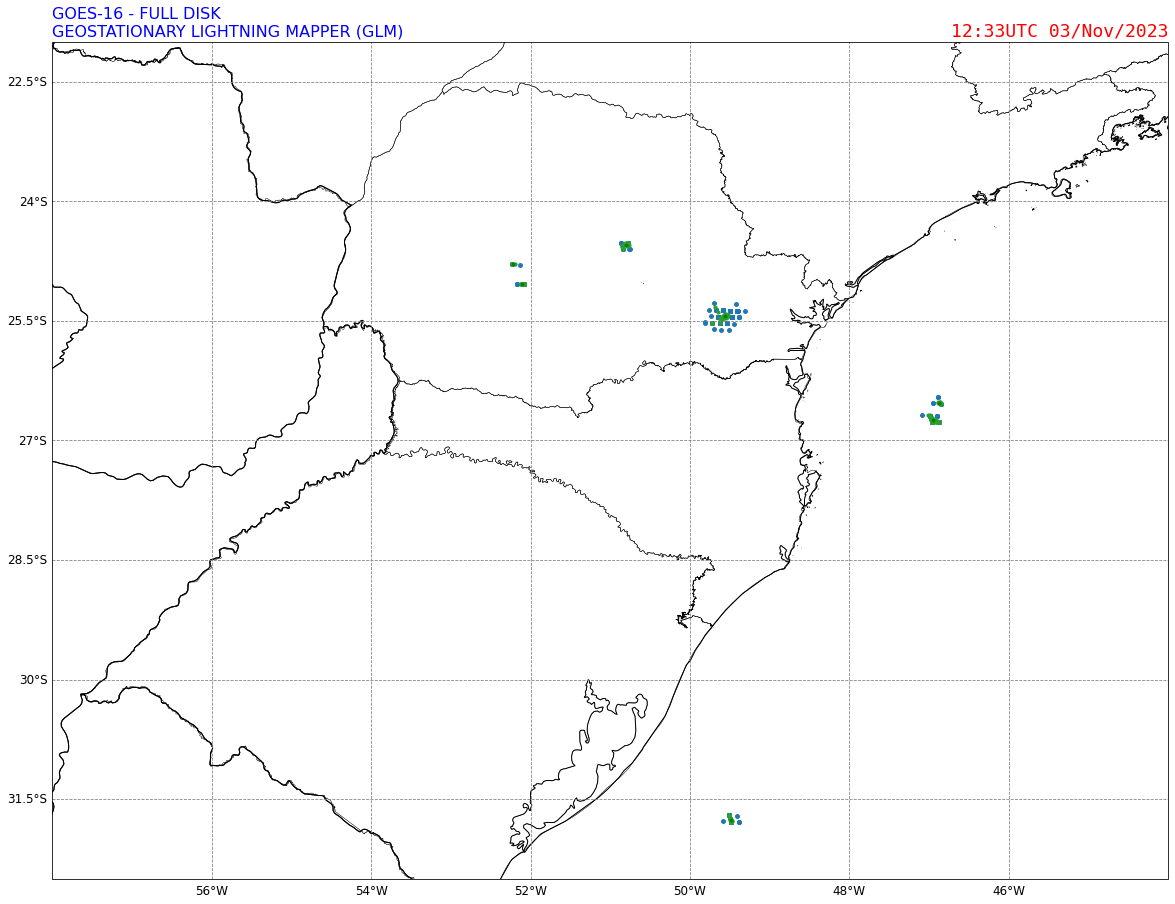

In [13]:
fig = plt.figure(figsize=(20,20))
pc = ccrs.PlateCarree()
ax= fig.add_subplot(1, 1, 1, projection=pc)
ax.coastlines(resolution="10m",edgecolor='k',linestyle='-',linewidth=0.3)
ax.set_extent([-58, -44, -32.5, -22], crs=pc)

states = list(shpreader.Reader
              ('C:/Users/igorr/OneDrive/Área de Trabalho/MAPAS/10/ne_10m_admin_0_countries.shp').geometries())
ax.add_geometries(states, ccrs.PlateCarree(), edgecolor='k',facecolor='none',linestyle='-',linewidth=1.)
states = list(shpreader.Reader
              ('C:/Users/igorr/OneDrive/Área de Trabalho/MAPAS/BR/BR_UF_2022.shp').geometries())
ax.add_geometries(states, ccrs.PlateCarree(), edgecolor='k',facecolor='none',linestyle='-',linewidth=0.5)

g1=ax.gridlines(crs=pc,linestyle='--',color='gray',draw_labels=True)
g1.right_labels=False
g1.top_labels=False
g1.yformatter=LATITUDE_FORMATTER
g1.xformatter=LONGITUDE_FORMATTER
g1.ylabel_style={'size':12,'color':'black'}
g1.xlabel_style={'size':12,'color':'black'}

map = Basemap( lat_0 = 0, lon_0 = -70.0,
    resolution = 'l', area_thresh = 1000.0,
    llcrnrlon=-58.0, llcrnrlat=-32.5,
    urcrnrlon=-44.0, urcrnrlat=-22.0)
event_x, event_y = map(event_lon, event_lat)
im=ax.scatter(event_x,event_y,c='#1f77b4',s=15, transform=ccrs.PlateCarree())

group_x, group_y = map(group_lon, group_lat)
im=ax.scatter(group_x,group_y,c='#2ca02c',s=10, transform=ccrs.PlateCarree())

flash_x, flash_y = map(flash_lon, flash_lat)
im=ax.scatter(flash_x,flash_y,c='g',s=7.5, transform=ccrs.PlateCarree())

plt.title('GOES-16 - FULL DISK\nGEOSTATIONARY LIGHTNING MAPPER (GLM)',
          fontsize=16,loc='left',color='blue')
plt.title('{}'.format(scan_start.strftime('%H:%MUTC %d/%b/%Y')),fontsize=18,loc='right',
          color='red',fontweight='normal',fontfamily='monospace')
#plt.savefig('GOES16_GLM_AS_'+scan_start.strftime('%H_%MUTC_%d_%b_%Y')+'.jpeg',dpi=300,bbox_inches='tight')